In [4]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3
import yfinance as yf
import pandas as pd


In [5]:
tesla = yf.Ticker("TSLA")
tesla_info=tesla.info
tesla_info
tesla_info['country']
tesla_share_price_data = tesla.history(period="max")
tesla_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [6]:
# using requests library to download the webpage
url='https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Save the text of the response
html_text = requests.get(url).text

# Parse the html data using beautiful_soup.
soup=BeautifulSoup(html_text, 'html5lib')

NameError: name 'requests' is not defined

In [7]:
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4
#!pip install plotly==5.3.1

/usr/bin/sh: mamba: command not found
/usr/bin/sh: mamba: command not found


In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [9]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

data  = requests.get(url).text

In [10]:
soup = BeautifulSoup(data, 'html5lib')

In [15]:


# Using beautiful soup extract the table with Tesla Quarterly Revenue.
# creating new dataframe
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

tables = soup.find_all('table')
table_index=0

for index, table in enumerate(tables):
    if ('Tesla Quarterly Revenue'in str(table)):
        table_index=index
        
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col!=[]):
        date =col[0].text
        # to remove comma and dollar sign
        revenue =col[1].text.replace("$", "").replace(",", "")
        tesla_revenue=tesla_revenue.append({'Date':date,'Revenue':revenue},
                                           ignore_index=True)

# displaying dataframe
tesla_revenue.tail()



,Date,Revenue
46,2010-06-30,28
47,2010-03-31,21
48,2009-12-31,
49,2009-09-30,46
50,2009-06-30,27


In [16]:
tesla_share_price_data.reset_index(inplace=True)

In [17]:
gme = yf.Ticker("GME")
gme_info=gme.info
gme_info
gme_info['country']
gme_share_price_data = gme.history(period="max")
gme_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,6.480513,6.773399,6.413183,6.766665,19054000,0.0,0.0
2002-02-14,6.850828,6.864294,6.682503,6.733001,2755400,0.0,0.0
2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
2002-02-19,6.665672,6.665672,6.312189,6.430017,1852600,0.0,0.0
2002-02-20,6.463682,6.648839,6.413184,6.648839,1723200,0.0,0.0


In [25]:
gme_share_price_data.reset_index(inplace=True)

<AxesSubplot:xlabel='Date'>

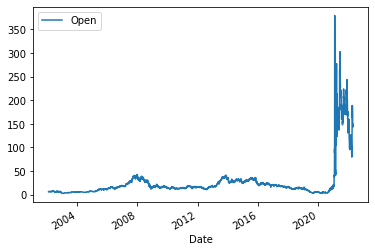

In [26]:
gme_share_price_data.plot(x="Date", y="Open")

In [18]:
g_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

g_data  = requests.get(g_url).text

In [19]:


# Using beautiful soup extract the table with gme Quarterly Revenue.
# creating new dataframe
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

tables = soup.find_all('table')
table_index=0

for index, table in enumerate(tables):
    if ('gme Quarterly Revenue'in str(table)):
        table_index=index
        
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col!=[]):
        date =col[0].text
        # to remove comma and dollar sign
        revenue =col[1].text.replace("$", "").replace(",", "")
        gme_revenue=gme_revenue.append({'Date':date,'Revenue':revenue},
                                           ignore_index=True)

# displaying dataframe
gme_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


<AxesSubplot:xlabel='Date'>

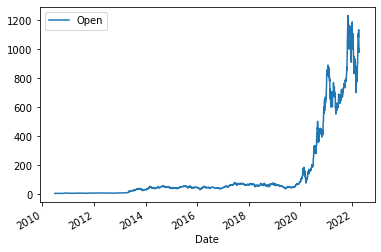

In [20]:
tesla_share_price_data.plot(x="Date", y="Open")